<h1 align="center" style="color:green"> Stroop effect analysis </h1>

This is psychology experience for demonstrating of the interference in the reaction time of a task. Participants are shown color words and are asked to say out loud the color of the words. There are two types of word: congruent words and incongruent words. While the first ones are words with matched colors such as: <font color='red'>RED</font>, <font color='blue'>BLUE</font>, <font color='green'>GREEN</font>, .etc, the latter ones are words with unmatched colors: <font color='purple'>YELLOW</font>, <font color='black'>WHITE</font>, <font color='red'>BLACK</font>. The participants will go through all the word list and record the responding time for each list.

<h3 align="left" style="color:blue"> Load Data from CSVs

In [1]:
import unicodecsv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# stroopData is a dataframe
stroopData = pd.read_csv('stroopdata.csv')

Display the first several rows

In [3]:
stroopData.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


<h3 align="left" style="color:blue">Independent variables and dependent variables

The independent variable is congruent data since it is not changed by the other variables. The reaction time is the dependent variable since it depends on which type of words is shown.
<br />We display the chart to show the reaction time of each participant in the experience. 

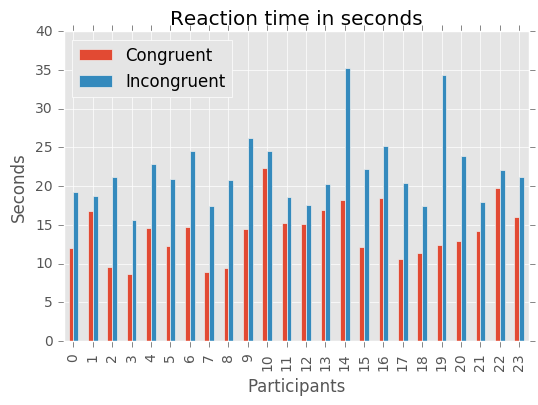

In [9]:
ax = stroopData.plot(x=None, y=None,kind='bar',title='Reaction time in seconds')
ax.set_xlabel("Participants")
ax.set_ylabel("Seconds")

Interestingly, the reaction time of the incongruent group clearly higher than that of the congruent group. We argue that our brain processes both groups in the same way. We also show the time difference in the below chart to see how much difference between the two groups

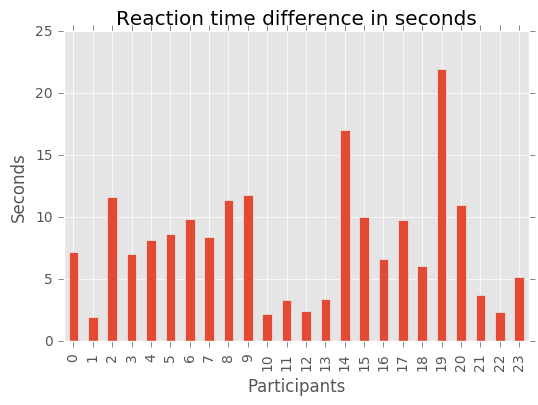

In [11]:
timeDiff = stroopData['Incongruent'] - stroopData['Congruent']
ax = timeDiff.plot(x=None, y=None,kind='bar',title='Reaction time difference in seconds')
ax.set_xlabel("Participants")
ax.set_ylabel("Seconds")



<h3 align="left" style="color:blue">Exploratory Data Analysis

In [37]:
stroopData.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<h3 align="left" style="color:blue">Hypothesis testing

Null hypothesis $H_0$: the incongurent words does not make the participants more time to finish naming the ink colors
<br/>Alternative hypothesis $H_A$: the incongurent words make the participants more time to finish naming the ink colors
<br/>
$H_0: \mu_{incongruent} <= \mu_{congruent}  $ 
<br/>
$
H_A: \mu_{incongruent} > \mu_{congruent}
$
<br />
where $\mu_{incongruent}$ and $\mu_{congruent}$ are population means of incongruent and congruent reaction times respectively

<h3 align="left" style="color:blue">Statistical Test

Because the population standard deviation is unknown and the sample size is less than 30, I will use the one tailed T-test to verify the hypothesis with significant level 0.05. Since each participant have two measurements and there is only one sample that has been tested twice, I will perform a dependent paired, two-sample for mean T-Test. 

In [33]:
Diff = stroopData['Incongruent'] - stroopData['Congruent']
T_score = Diff.mean()/(Diff.std()/len(Diff)**0.5)

In [36]:
print("T_score",T_score)

('T_score', 8.020706944109957)


Alpha: 0.05
<br />T-Critical: 1.713872
<br />T_score: 8.020706944109957
<br />P_value(one-tailed): <0.00001
<br />
<br />Decision: reject null hypothesis

<h3 align="left" style="color:blue">Conclusion

Getting pretty small p-value means that we can safely reject the null-hypothesis. The color of printed word does affect human brain in naming the color of the shown words. It also took me longer to correctly name the color of the words in my own experience. It seems that our brain has been trained quite a long time by reading the textbook, newspaper, ..etc. so when we look at a word, our brain put a higher priority on the words themselves rather than their color ink. I tried to carry the same experiment on some children who has not known how to read yet but has known colors. The reaction time in the both group is quite the same.
<br /><br />
We can use this analysis technique on some other tests such as time in seconds of standing on non-dominant leg, time to finish a essay with non-dominant hand, .etc.